In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = np.load('../../skill4_Face_Age_Estimation/assets/dataset/data.npz')

# Extract the data
X = data['X']; y_gender = data['y_gender']; y_age = data['y_age']

# Load the models
model_1 = load_model('../../skill4_Face_Age_Estimation/models/age_gender_estimation/custom_CNN/custom_CNN.keras')
model_2 = load_model('../../skill4_Face_Age_Estimation/models/age_gender_estimation/custom_ResNet50/custom_ResNet50.keras')

# Get the validation split by sampling 20% of X instead of using taking the last 20% of the data
val_split = int(len(X) * 0.2)
indices = np.random.permutation(len(X))
val_indices = indices[:val_split]
X_val = X[val_indices]
y_gender_val = y_gender[val_indices]

c:\Users\froms\anaconda3\envs\si\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\froms\anaconda3\envs\si\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 218 variables whereas the saved optimizer has 434 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# Dictionary to map gender prediction to string
gender_dict = {0: 'Male', 1: 'Female'}

# Preprocess the images and predict ages using your models
predicted_gender_model_1 = []
predicted_gender_model_2 = []

for image in X_val:
    # Preprocess the image
    input_image = image.reshape(128, 128, 3)  # assuming the image is RGB
    input_image = np.expand_dims(input_image, axis=0)  # add batch dimension

    # Make predictions
    pred_1 = model_1.predict(input_image)
    pred_2 = model_2.predict(input_image)

    # Store the predictions
    predicted_gender_model_1.append(gender_dict[round(pred_1[0][0][0])])
    predicted_gender_model_2.append(gender_dict[round(pred_2[0][0][0])])

# Convert the lists to numpy arrayss
predicted_gender_model_1 = np.array(predicted_gender_model_1)
predicted_gender_model_2 = np.array(predicted_gender_model_2)

# Calculate the true ages
true_gender = y_gender_val

In [32]:
# Mapping function
def map_gender_to_int(gender_array):
    return np.where(gender_array == 'Male', 0, 1)

# Apply the mapping
predicted_gender_model_1_int = map_gender_to_int(predicted_gender_model_1)
predicted_gender_model_2_int = map_gender_to_int(predicted_gender_model_2)

# `Age_dist`

Number of Male observations: 12391
Number of Female observations: 11317


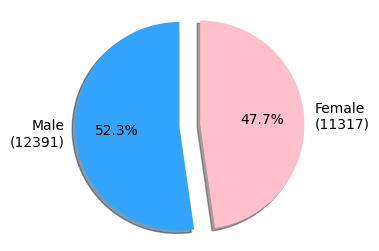

In [94]:
# Count the occurrences of each gender in the whole dataset
gender_counts_full = np.bincount(y_gender)

# Show the number of observations of each class
print(f"Number of Male observations: {gender_counts_full[0]}")
print(f"Number of Female observations: {gender_counts_full[1]}")

# Plot a pie chart for the gender distribution
plt.figure(figsize=(4, 3))
plt.pie(
    gender_counts_full, 
    labels=[
        f'Male\n({gender_counts_full[0]})', 
        f'Female\n({gender_counts_full[1]})'
        ], 
    autopct='%1.1f%%', 
    colors=['#33a5ff', 'pink'], 
    startangle=90,
    explode=[0.1 for _ in range(pd.Series(y_gender).nunique())],
    shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

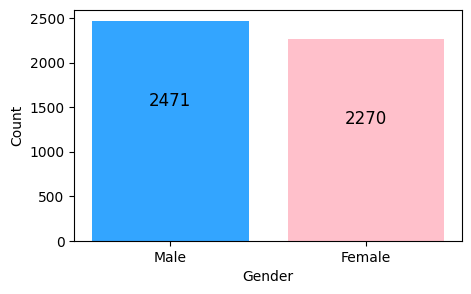

In [100]:
# Count the occurrences of each gender in the validation set
gender_counts = np.bincount(y_gender_val)

# Create a bar plot for the gender distribution
plt.figure(figsize=(5, 3))
bars = plt.bar(['Male', 'Female'], gender_counts, color=['#33a5ff', 'pink'])

# Add the number of observations on top of each bar
for bar, count in zip(bars, gender_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 1000, str(count), ha='center', va='bottom', color='black', fontsize=12)

# Show the plot
plt.xlabel('Gender')
plt.ylabel('Count')
# plt.title('Gender Distribution in Validation Set')
plt.show()

Classification Report for Model 1:
               precision    recall  f1-score   support

        Male       0.93      0.95      0.94      2479
      Female       0.95      0.92      0.93      2262

    accuracy                           0.94      4741
   macro avg       0.94      0.94      0.94      4741
weighted avg       0.94      0.94      0.94      4741

Classification Report for Model 2:
               precision    recall  f1-score   support

        Male       0.74      0.97      0.84      2479
      Female       0.95      0.63      0.76      2262

    accuracy                           0.81      4741
   macro avg       0.85      0.80      0.80      4741
weighted avg       0.84      0.81      0.80      4741

Confusion Matrix for Model 1:
 [[2364  115]
 [ 187 2075]]
Confusion Matrix for Model 2:
 [[2411   68]
 [ 841 1421]]


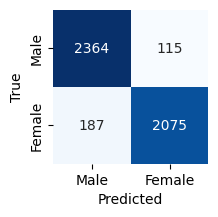

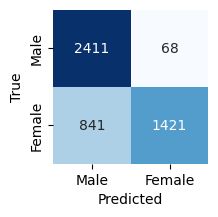

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report for model 1
report_model_1 = classification_report(true_gender, predicted_gender_model_1_int, target_names=['Male', 'Female'])
print("Classification Report for Model 1:\n", report_model_1)

# Generate classification report for model 2
report_model_2 = classification_report(true_gender, predicted_gender_model_2_int, target_names=['Male', 'Female'])
print("Classification Report for Model 2:\n", report_model_2)

# Generate confusion matrix for model 1
conf_matrix_model_1 = confusion_matrix(true_gender, predicted_gender_model_1_int)
print("Confusion Matrix for Model 1:\n", conf_matrix_model_1)

# Generate confusion matrix for model 2
conf_matrix_model_2 = confusion_matrix(true_gender, predicted_gender_model_2_int)
print("Confusion Matrix for Model 2:\n", conf_matrix_model_2)

# Plot confusion matrix for model 1
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_model_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix for Model 1')
plt.show()

# Plot confusion matrix for model 2
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix_model_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
# plt.title('Confusion Matrix for Model 2')
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Model 1
precision_model_1 = precision_score(true_gender, predicted_gender_model_1_int, average='weighted')
recall_model_1 = recall_score(true_gender, predicted_gender_model_1_int, average='weighted')
f1_model_1 = f1_score(true_gender, predicted_gender_model_1_int, average='weighted')
accuracy_model_1 = accuracy_score(true_gender, predicted_gender_model_1_int)

print(f'Model 1 - Precision: {precision_model_1}')
print(f'Model 1 - Recall: {recall_model_1}')
print(f'Model 1 - F1 Score: {f1_model_1}')
print(f'Model 1 - Accuracy: {accuracy_model_1}')

# Model 2
precision_model_2 = precision_score(true_gender, predicted_gender_model_2_int, average='weighted')
recall_model_2 = recall_score(true_gender, predicted_gender_model_2_int, average='weighted')
f1_model_2 = f1_score(true_gender, predicted_gender_model_2_int, average='weighted')
accuracy_model_2 = accuracy_score(true_gender, predicted_gender_model_2_int)

print(f'Model 2 - Precision: {precision_model_2}')
print(f'Model 2 - Recall: {recall_model_2}')
print(f'Model 2 - F1 Score: {f1_model_2}')
print(f'Model 2 - Accuracy: {accuracy_model_2}')

Model 1 - Precision: 0.9366161375881952
Model 1 - Recall: 0.9363003585741405
Model 1 - F1 Score: 0.936241169140268
Model 1 - Accuracy: 0.9363003585741405
Model 2 - Precision: 0.842987566314094
Model 2 - Recall: 0.8082682978274626
Model 2 - F1 Score: 0.8014428501182435
Model 2 - Accuracy: 0.8082682978274626
